In [18]:
import pandas as pd
reviews_df = pd.read_csv('Amazon_Reviews.csv')
#reviews.head(10)
reviews_df['Label']=reviews_df['Label'].map({'__label__2 ':1,'__label__1 ':0})
reviews_df
from sklearn.model_selection import train_test_split
y = reviews_df['Label']
reviews_df.drop(columns='Label',inplace=True)

X_train,X_test,y_train,y_test= train_test_split(reviews_df,y,test_size=.2,random_state=42)


In [19]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer


In [20]:
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocessing(review):
    final_tokens = ' '
    tokens = tokenizer.tokenize(review)
    pure_tokens = [token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    lemmas_tokens = [lemmatizer.lemmatize(pure_token) for pure_token in pure_tokens]
    
    final_tokens = final_tokens.join(lemmas_tokens)
    return final_tokens
X_train['Cleaned_text'] = X_train['Review'].apply(preprocessing)        

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [21]:
X_test['Cleaned_text'] = X_test['Review'].apply(preprocessing)


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvect = TfidfVectorizer()
X_train_tfidf = tfidfvect.fit_transform(X_train['Cleaned_text'])
X_test_tfidf = tfidfvect.transform(X_test['Cleaned_text'])
print(X_train_tfidf)


  (0, 1005)	0.15094474636574956
  (0, 2287)	0.29534410163545854
  (0, 1021)	0.11580965667338965
  (0, 803)	0.1315046854991435
  (0, 460)	0.1315046854991435
  (0, 2233)	0.12013297888044212
  (0, 1409)	0.11206462463253741
  (0, 1385)	0.15094474636574956
  (0, 1943)	0.15094474636574956
  (0, 648)	0.1395730397470482
  (0, 2454)	0.1395730397470482
  (0, 62)	0.12013297888044212
  (0, 2252)	0.07499455538794908
  (0, 286)	0.1395730397470482
  (0, 1482)	0.11580965667338965
  (0, 2021)	0.11206462463253741
  (0, 222)	0.1395730397470482
  (0, 2221)	0.2791460794940964
  (0, 57)	0.1395730397470482
  (0, 837)	0.1395730397470482
  (0, 283)	0.15094474636574956
  (0, 1029)	0.1315046854991435
  (0, 740)	0.0849978891880822
  (0, 1337)	0.15094474636574956
  (0, 511)	0.103133246002185
  :	:
  (158, 1357)	0.3335569354901401
  (158, 1333)	0.12770199415622277
  (158, 1315)	0.14687352786525884
  (158, 2064)	0.15235650400807577
  (158, 434)	0.16677846774507005
  (158, 2488)	0.14687352786525884
  (158, 1958)	0.14

In [28]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import confusion_matrix,f1_score,roc_curve
clf = MultinomialNB().fit(X_train_tfidf.toarray(),y_train)
y_pred = clf.predict(X_test_tfidf.toarray())
y_pred


                       

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [29]:
confusion_matrix(y_test,y_pred)

array([[ 9,  6],
       [ 2, 23]], dtype=int64)

In [57]:
f1_score(y_test,y_pred)*100

85.18518518518519

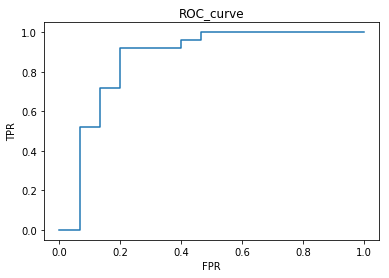

In [58]:
import matplotlib.pyplot as plt
y_pred_proba = clf.predict_proba(X_test_tfidf.toarray())[::,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curve')
plt.show()

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)
predicted = lr.predict(X_test_tfidf)
predicted

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [60]:
f1_score(y_test,predicted)*100

88.8888888888889

In [61]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train_tfidf,y_train)
svc_pred = svc.predict(X_test_tfidf)
svc_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [62]:
f1_score(y_test,svc_pred)*100

90.19607843137256